<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2026-01-19 01:59:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.1’

survey-results-publ 100%[===================>] 201.62M  66.5MB/s    in 3.0s    

2026-01-19 01:59:29 (66.5 MB/s) - ‘survey-results-public.sqlite.1’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [3]:
!pip install pandas

In [5]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 65.0 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [7]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


float64


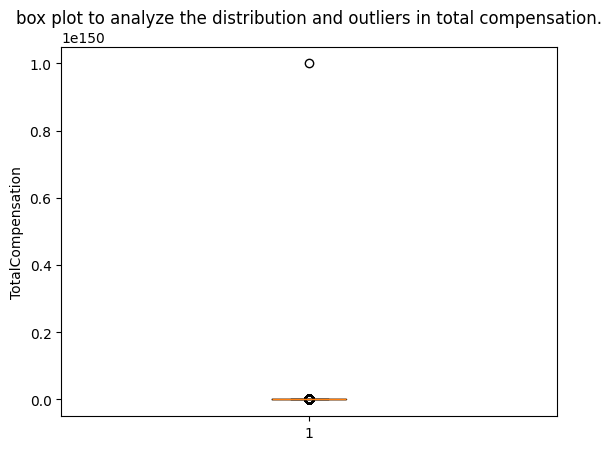

In [10]:
# your code goes here
QUERY = """
SELECT CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL
"""
df_comp = pd.read_sql_query(QUERY, conn)
print(df_comp['CompTotal'].dtypes)
plt.Figure(figsize=(12,6))
plt.boxplot(df_comp['CompTotal'])
plt.title("box plot to analyze the distribution and outliers in total compensation.")
plt.ylabel("TotalCompensation")
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


                  Age  Age_numeric
0  Under 18 years old         16.0
1     35-44 years old         39.5
2     45-54 years old         49.5
3     18-24 years old         21.0
4     18-24 years old         21.0


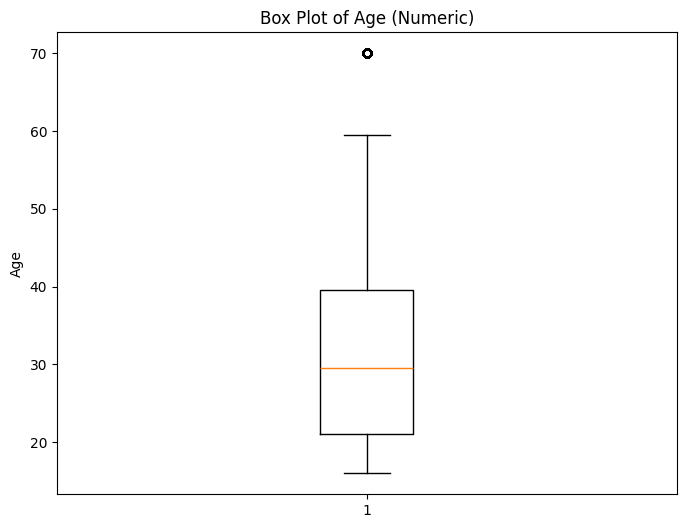

In [24]:
# your code goes here
QUERY = """
SELECT Age FROM main
WHERE Age IS NOT NULL
"""
df_age = pd.read_sql_query(QUERY, conn)
#Convert age to numeric
age_mapping = {
   'Under 18 years old': 16,
   '18-24 years old': 21,
   '25-34 years old': 29.5,
   '35-44 years old': 39.5,
   '45-54 years old': 49.5,
   '55-64 years old': 59.5,
   '65 years or older': 70,
 }
df_age['Age_numeric'] = df_age['Age'].map(age_mapping)
print(df_age.head())
plt.figure(figsize=(8,6))
plt.boxplot(df_age['Age_numeric'].dropna())
plt.title('Box Plot of Age (Numeric)')
plt.ylabel('Age')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [26]:
!pip install seaborn
import seaborn as sns

   CompTotal              Age Age_clean
0  2040000.0  18-24 years old     18-24
1    28000.0  25-34 years old     25-34
2    85000.0  35-44 years old     35-44
3    50000.0  35-44 years old     35-44
4   110000.0  25-34 years old     25-34
5   126420.0  35-44 years old     35-44
6    95000.0  45-54 years old     45-54
7   195000.0  45-54 years old     45-54
8    35000.0  35-44 years old     35-44
9    54000.0  55-64 years old     55-64


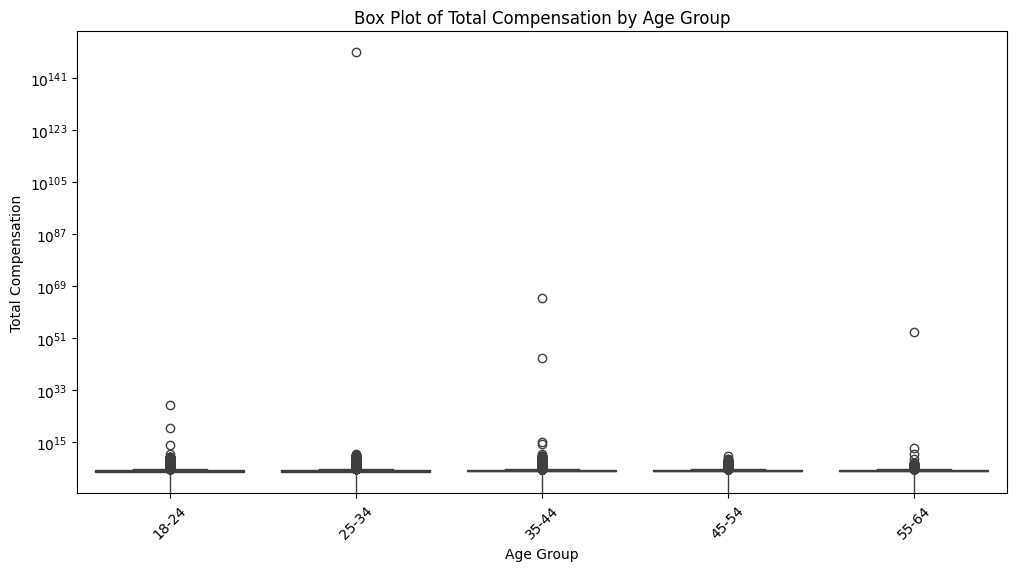

In [40]:
# your code goes here
QUERY = """
SELECT CompTotal,Age FROM main
WHERE Age IS NOT NULL and CompTotal IS NOT NULL
"""
df_age_comp = pd.read_sql_query(QUERY, conn)
df_age_comp['CompTotal'] = pd.to_numeric(df_age_comp['CompTotal'], errors='coerce')
#Convert age to numeric
age_order = [
   'Under 18 years old',
   '18-24 years old',
   '25-34 years old',
   '35-44 years old',
   '45-54 years old',
   '55-64 years old',
   '65 years or older',
]
df_age_comp['Age_clean'] = df_age_comp['Age'].str.extract(r'(\d+-\d+)')
#df_age_comp['Age'] = pd.Categorical(df_age_comp['Age'], categories=age_order, ordered=True)
print(df_age_comp.head(10))
plt.figure(figsize=(12,6))
sns.boxplot(x='Age_clean', y='CompTotal', data=df_age_comp)
plt.title('Box Plot of Total Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.yscale('log')
plt.xticks(rotation=45)

plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


    JobSatPoints_6      CompTotal
0              0.0  1.000000e+150
1              1.0   4.649315e+08
2              2.0   2.132422e+08
3              3.0   4.734275e+07
4              4.0   3.075334e+08
5              5.0   2.326884e+09
6              6.0   1.276198e+07
7              7.0   9.455688e+09
8              8.0   2.146437e+08
9              9.0   1.038744e+08
10            10.0   1.000000e+53
11            11.0   1.000000e+65
12            12.0   2.774121e+07
13            12.5   2.463500e+07
14            13.0   7.958910e+07
15            14.0   1.852894e+07
16            15.0   7.300786e+09
17            16.0   1.085673e+08
18            17.0   2.941650e+08
19            17.5   3.600000e+05
20            18.0   6.675752e+07
21            19.0   2.768497e+07
22            20.0   5.706851e+10
23            21.0   6.336000e+06
24            22.0   8.000000e+27
25            23.0   5.769400e+06
26            24.0   2.593100e+06
27            25.0   1.868618e+09
28            

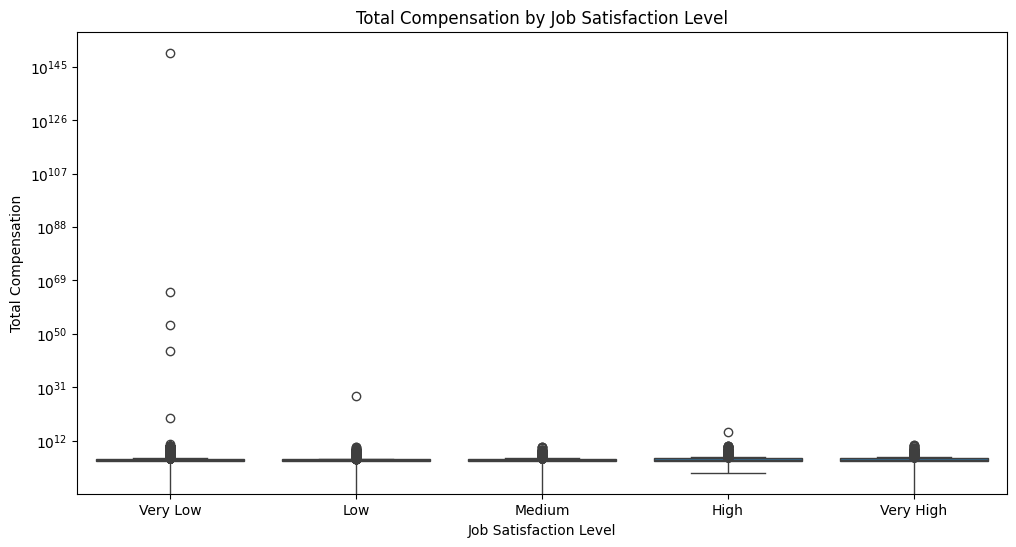

In [55]:
# your code goes here
QUERY = """
SELECT CompTotal,JobSatPoints_6 FROM main
WHERE JobSatPoints_6 IS NOT NULL and CompTotal IS NOT NULL
"""
df_comp_job = pd.read_sql_query(QUERY, conn)
# Create job satisfaction bins
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df_comp_job['JobSatGroup'] = pd.cut(df_comp_job['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

#df_comp_job_grouped = df_comp_job.groupby('JobSatPoints_6')['CompTotal'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.boxplot(x='JobSatGroup', y='CompTotal', data=df_comp_job)
plt.yscale('log')  # optional if compensation is skewed
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Total Compensation')
plt.title('Total Compensation by Job Satisfaction Level')
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


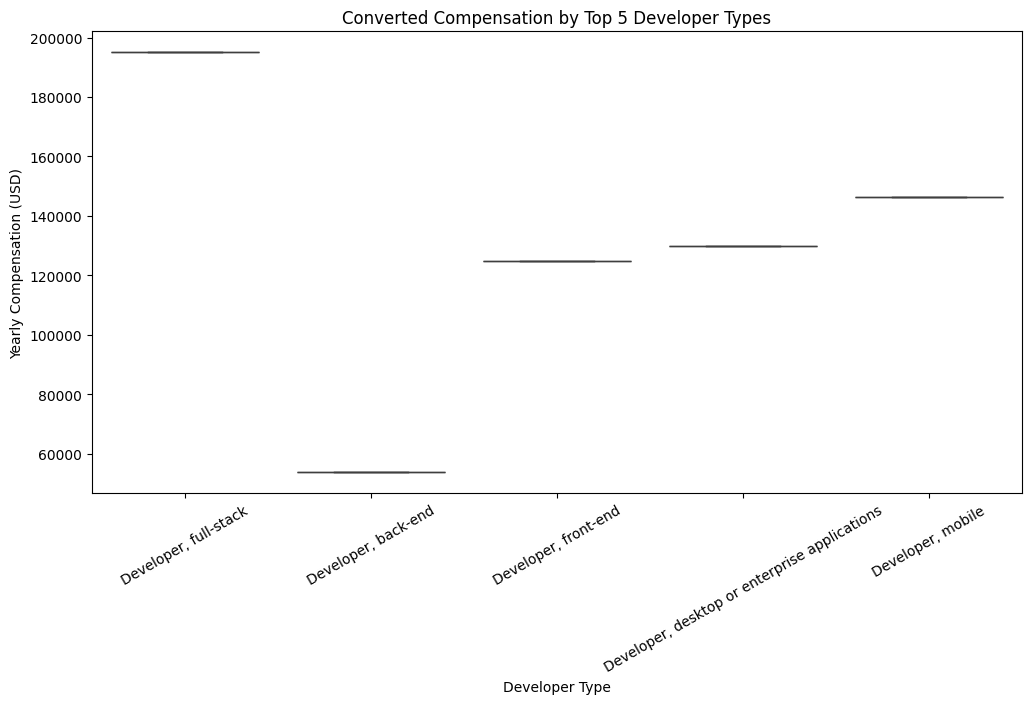

In [73]:
# your code goes here
QUERY = """
SELECT ConvertedCompYearly,DevType,COUNT(*) AS count FROM main
WHERE DevType IS NOT NULL and ConvertedCompYearly IS NOT NULL 
GROUP BY DevType
ORDER BY count DESC
LIMIT 5;
"""
top_5_dev = pd.read_sql_query(QUERY, conn)
top_5_dev.head()
plt.figure(figsize=(12,6))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=top_5_dev)

# Optional: log scale for skewed salaries

plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation (USD)')
plt.title('Converted Compensation by Top 5 Developer Types')
plt.xticks(rotation=30)
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [5]:
# your code goes here
top_countries_query = """
SELECT Country
FROM main
WHERE CompTotal IS NOT NULL AND Country IS NOT NULL
GROUP BY Country
ORDER BY COUNT(*) DESC
LIMIT 5
"""
top_countries_df = pd.read_sql_query(top_countries_query, conn)
top_countries = top_countries_df['Country'].tolist()

# Step 2: Get all CompTotal values for those top 5 countries
comp_query = f"""
SELECT CompTotal, Country
FROM main
WHERE CompTotal IS NOT NULL
  AND Country IN ({','.join(["'" + c + "'" for c in top_countries])})
"""
df_top5 = pd.read_sql_query(comp_query, conn)
top_countries = df_top5['Country'].tolist()
df_top5.head()


,CompTotal,Country
0,110000.0,United States of America
1,126420.0,United Kingdom of Great Britain and Northern I...
2,95000.0,United Kingdom of Great Britain and Northern I...
3,195000.0,United States of America
4,145000.0,United Kingdom of Great Britain and Northern I...


/tmp/ipykernel_366/1551781843.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(comp_data, labels=countries, vert=True)


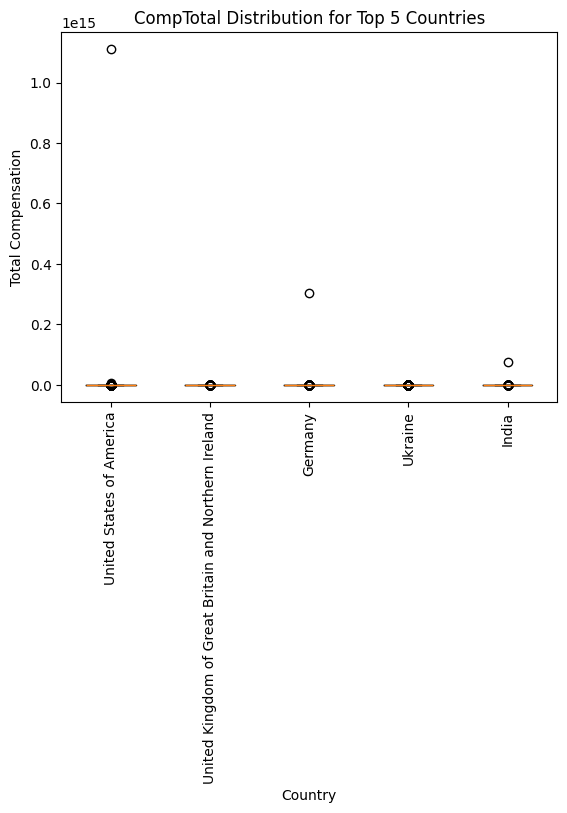

In [13]:
# Identify top 5 countries by count
top_countries = df_top5["Country"].value_counts().nlargest(5).index

# Filter dataset
filtered_df = df_top5[df_top5["Country"].isin(top_countries)]

countries = filtered_df["Country"].unique()
comp_data = [
    filtered_df[filtered_df["Country"] == country]["CompTotal"]
    for country in countries
]

# Create box plot
plt.figure()
plt.boxplot(comp_data, labels=countries, vert=True)

# Labels and title
plt.xlabel("Country")
plt.ylabel("Total Compensation")
plt.title("CompTotal Distribution for Top 5 Countries")

plt.xticks(rotation=90)
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [20]:
# your code goes here
QUERY = """
SELECT CompTotal,Employment FROM main
WHERE Employment IS NOT NULL and CompTotal IS NOT NULL
"""
df_emp = pd.read_sql_query(QUERY, conn)
df_emp .head()
# Split Employment into lists
df_emp["Employment"] = df_emp["Employment"].str.split(";")
# Explode into separate rows
df_exploded = df_emp.explode("Employment")

/tmp/ipykernel_366/1016485586.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=employment_types)


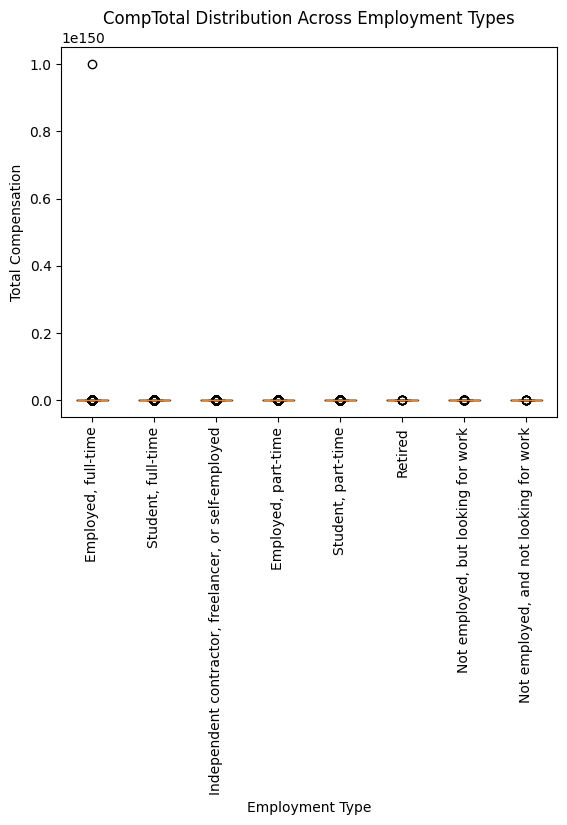

In [22]:
employment_types = df_exploded['Employment'].unique()
data_to_plot = [df_exploded[df_exploded['Employment'] == emp]['CompTotal'] for emp in employment_types]
# Create box plot
plt.figure()
plt.boxplot(data_to_plot, labels=employment_types)

# Labels and title
plt.xlabel("Employment Type")
plt.ylabel("Total Compensation")
plt.title("CompTotal Distribution Across Employment Types")

plt.xticks(rotation=90)
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [26]:
# your code goes here
QUERY = """
SELECT YearsCodePro,JobSatPoints_6 FROM main
WHERE JobSatPoints_6 IS NOT NULL and YearsCodePro IS NOT NULL
"""
df_job = pd.read_sql_query(QUERY, conn)
df_job .head()
# Create job satisfaction bins
bins = [0, 33, 66, 100]
labels = ["Low", "Medium", "High"]

df_job["JobSatGroup"] = pd.cut(
    df_job["JobSatPoints_6"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [28]:
# Group YearsCodePro by job satisfaction group
groups = ["Low", "Medium", "High"]
years_data = [
    df_job[df_job["JobSatGroup"] == group]["YearsCodePro"]
    for group in groups
]
years_data["YearsCodePro"] = years_data["YearsCodePro"].replace({
    "Less than 1 year": 0.5,
    "More than 50 years": 50
})

# Box plot
plt.figure()
plt.boxplot(years_data, labels=groups)

plt.xlabel("Job Satisfaction Level")
plt.ylabel("Years of Professional Coding Experience")
plt.title("YearsCodePro by Job Satisfaction Level")

plt.show()

TypeError: list indices must be integers or slices, not str

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
